# 1. Hashing task!

In [1]:
import numpy as np
import random
import time
import pandas as pd
from random import shuffle as sf
from random import randint as rd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

### First of all we need to find (n) the number of all the elements which are going to be inserted in the bloom filter.

In [2]:
pool = open("passwords1.txt")
n = 0
while(pool.readline() != ""):
    n += 1
pool.close()

In [3]:
print(n)

100000000


### From the bloom filter's wikipedia page we can see that the optimal number of hash functions can be attained from these formulas:
### $k = \frac{m}{n} ln(2)$
### $m = - \frac{n (lnp)}{(ln2)^2}$
##### k = The number of hash functions.<br>n = The number of inserted elements.<br>m = Size of the bloom filter.<br>p = False positive rate.

In [4]:
# here we take p = 0.01 and find corresponding m:
p = 0.05
m = -1*n*np.log(p)/(np.log(2))**2
print(m)

623522422.9572682


#### We want the size of our bloom filter to be a prime number so we can use it in our hash function, so we will find the closest prime number to this:

In [5]:
def is_prime(a):
    ub = np.floor(int(np.sqrt(a)))
    for i in range(2 ,int(ub)):
        if a % i == 0:
            return False
    return True

def closest_prime(a):
    i = 0
    a = np.floor(a)
    while(True):
        if(is_prime(a +i)):
            return int(a + i)
        if( m -i > 0 and is_prime(a -i)):
            return int(a - i)
        i += 1

m = closest_prime(m)
print(m)

623522423


#### Now that we have the size of our bloom filter, we can find the optimal number of hash functions:

In [6]:
k = m * np.log(2) / n
k = int(round(k))
print(k)

4


### It's time to create our hash functions
#### We need 20 random coefficients for each hash function:

In [7]:
coeffs = []
for i in range(k):
    a = []
    for j in range(20):
        a.append(random.randrange(m))
    coeffs.append(a)
print(coeffs)
        

[[137764682, 314396409, 353945432, 75742771, 309245389, 18300369, 272098438, 40734884, 56208480, 33011002, 317609153, 582008730, 329017868, 298235097, 592170620, 283341426, 337819242, 55136982, 298203738, 234778959], [492398237, 529394535, 270980423, 385778073, 172099484, 512972309, 87370041, 63574328, 233832667, 206353444, 432606583, 129495094, 440497579, 181275207, 477360785, 522286155, 611343192, 122219416, 57299481, 237780027], [571923885, 302176175, 197234184, 342650466, 523602128, 359926323, 229552571, 37271860, 61547816, 337345667, 268219831, 233733500, 365994133, 557121759, 499169399, 479601089, 140454426, 87488479, 295977027, 96147671], [553424247, 37761661, 485554170, 603090137, 69506933, 306857497, 350832038, 540896445, 444856890, 442407900, 425931361, 162983597, 236613639, 420498737, 87324404, 14297922, 402698035, 119776982, 618053139, 92108484]]


In [8]:
def my_hash(m, coeffs, string):
    h = 0
    for i in range(20):
        h += ord(string[i]) * coeffs[i]
    return h%m

### Now that our hash functions are ready, we can fill out the bloom filter:

In [9]:
bloom_filter = []
for i in range(m):
    bloom_filter.append(False)

In [10]:
pool = open("passwords1.txt")
start = time.time()
for i in range(n):
    s = pool.readline()
    for j in range(k):
        key = my_hash(m, coeffs[j], s)
        bloom_filter[key] = True
pool.close()

### Now that the bloom filter is available we can get the results for our test set.

In [11]:
duplicate = 0 #counter for duplicate passwords
test = open("passwords2.txt")
s = test.readline()
while(s != ""):
    flag = True
    for i in range(k):
        key = my_hash(m, coeffs[i], s)
        if( bloom_filter[key] == False ):
            flag = False
            break
    if(flag):
        duplicate += 1
    s = test.readline()
end = time.time()
test.close()
print(duplicate, " password(s) are present in the filter.")

15257184  password(s) are present in the filter.


In [13]:
print('Number of hash function used: ', k)
print('Number of duplicates detected: ', duplicate)
print('Probability of false positives: around ', p)
print('Execution time: ', end-start)

Number of hash function used:  4
Number of duplicates detected:  15257184
Probability of false positives: around  0.05
Execution time:  2782.8581113815308


# 2. Alphabetical Sort

#### My counting sort is a checking of the list:
#### if an element isn't in the right position related to the next one,
#### it will be moved to the last position of the list
#### until we have the right order.
#### For example: list=[Nazanin,Dario,Wei] will be modified in [Dario,Wei,Nazanin] and then in [Dario,Nazanin,Wei]

### LETTERS SORTING

In [72]:
l=list(map(str,input().split()))
for k in range(len(l)):
    l[k]=l[k].lower()
#Using a dictionary, the algorithm assigns a value to each letter
alph={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,
      'g':6,'h':6,'i':7,'j':8,'k':9,'l':10,
      'm':11,'n':12,'o':13,'p':14,'q':15,'r':16,
      's':17,'t':18,'u':19,'v':20,'w':21,'x':22,'y':23,'z':24} 

l a z b


In [75]:
def sortChar(l):
    l1=l[:]
    #At every iteration of the recursive function,the algorithm check if each letter has an higher value than the next one
    for i in range(len(l1)-1):
        if alph[l1[i]]>alph[l1[i+1]]:  #If it happens, the letter is moved to the last position of the list
            l1.append(l1[i])
            l1.remove(l1[i])
            break
    res=1    
    for j in range(len(l)):
        if l[j]!=l1[j]:
            res=0
            break
    if res==0:
        l=l1[:]  #If the sorted list is different from the starting one, the function repeats the operations with the new list!
        return sortChar(l) 
    elif res==1:
        return print(l1)   #If the sorted list is equal to the starting one, the algorithm stops!

In [77]:
sortChar(l)

['a', 'b', 'l', 'z']


### WORDS SORTING

In [78]:
l=list(map(str,input().split()))
for k in range(len(l)):
    l[k]=l[k].lower()
#Using a dictionary, the algorithm assigns a value to each letter
alph={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,
      'g':6,'h':6,'i':7,'j':8,'k':9,'l':10,
      'm':11,'n':12,'o':13,'p':14,'q':15,'r':16,
      's':17,'t':18,'u':19,'v':20,'w':21,'x':22,'y':23,'z':24} 

Nazanin Dario Wei


In [79]:
def sortWords(l):
    l1=l[:]
#At every iteration of the recursive function,the algorithm check if each word's letter has an higher value than the next word's letter
    for i in range(len(l1)-1):
        for j in range(len(l1[i])):
            try:
                if alph[l1[i][j]]>alph[l1[i+1][j]]:  #If it happens, the word is moved to the last position of the list
                    l1.append(l1[i])
                    l1.remove(l1[i])
                    break
                elif alph[l1[i][j]]<alph[l1[i+1][j]]: #if it doesn't happen, the algo pass to the next word
                    break
                else:
                    pass          #If the values are equal, the algo pass to the next letter
            except IndexError:
                pass
    res=1    
    for j in range(len(l)):
        if l[j]!=l1[j]:
            res=0
            break
    if res==0:
        l=l1[:]  #If the sorted list is different from the starting one, the function repeats the operations with the new list!
        return sortWords(l) 
    elif res==1:
        return print(l1)   #If the sorted list is equal to the starting one, the algorithm stops!

In [80]:
sortWords(l)

['dario', 'nazanin', 'wei']


# 3. Find similar wines!

In [57]:
f= open("C:/Users/nazi/Desktop/Ms Courses/ADM/HW4/3. Find similar wines/wine.data","r")
columns=['type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
         'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df=pd.read_csv(f, delimiter=",", header=None, names= columns)
data = df.values

In [81]:
data

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [58]:
def dist(x,y):
    distance=math.sqrt(sum([(a-b)**2 for a,b in zip(x,y)])) #Euclidean distance
    return distance

### What we pass to the function is :
#### 1. The data in the form of a matrix <br> 2. The number of clusters (k) <br> 3. The number of column to be used as x axis<br> 4. The number of column to be used as y axis <br> 5. A list containing the name of all the columns

In [59]:
def kmeans(matrix, k, x, y, columns):
    points = []
    for item in matrix:
        points.append((item[x], item[y]))
    centers = [] # to store the centers
    clusters = [[] for i in range(k)]  #A list that groupify the points according to the clusters
    #find the input range
    x_min = int(np.floor(min(points)[0]))
    x_max = int(np.ceil(max(points)[0]))
    y_min = int(np.floor(min(points, key = lambda t: t[1]))[1])
    y_max = int(np.ceil(max(points, key = lambda t: t[1]))[1])
    # pick centers by random
    for _ in range(k):
        centers.append((random.randrange(x_min, x_max), random.randrange(y_min, y_max)))
    # the first plot without clusters
    plt.figure(figsize=(20,10))
    plt.gca().set_aspect('equal', adjustable='box')
    for c in centers:
        plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
    for point in points:
        plt.scatter(point[0],point[1], c='b', marker='o')
    plt.title('WINES',fontsize=30)
    plt.xlabel(columns[x], fontsize=20)
    plt.ylabel(columns[y], fontsize=20)
    plt.show()
    
    flag = True #to know if we need to continue iterations
    iter = 0 #to count the iterations
    while(flag):
        if iter > 0:
            flag = False
        for point in points:
            cluster = -1
            #find the cluster which contains each point and distance
            for i in range(len(clusters)): 
                for item in clusters[i]:
                    if item == point:
                        cluster = i
            distance = dist(centers[cluster], point)
            #find new cluster for each point and new distance
            distances = [] 
            for c in centers: 
                distances.append(dist(c, point))
            new_distance = min(distances)
            new_cluster = np.argmin(distances)
            # after the first iteration if any changes happens to the clusters
            # ... we need to iter again
            if iter > 0 and cluster != new_cluster and new_distance < distance:
                flag = True
                clusters[cluster].remove(point)
                clusters[new_cluster].append(point)
            if iter == 0:
                clusters[new_cluster].append(point)
                
        
        #updating scatterplot
        plt.figure(figsize=(20,10))
        for c in centers:
            plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
        colors = cm.rainbow(np.linspace(0, 1, k))
        for i in range(k):
            for p in clusters[i]:
                plt.scatter(p[0],p[1], c = [colors[i]], marker='o')
        plt.title('WINES',fontsize=30)
        plt.xlabel(columns[x], fontsize=20)
        plt.ylabel(columns[y], fontsize=20)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
                    

        #updating centers
        for i in range(len(centers)):
            sum_x = 0
            sum_y = 0
            for item in clusters[i]:
                sum_x += item[0]
                sum_y += item[1]
            try:
                centers[i] = (sum_x/len(clusters[i]), (sum_y/len(clusters[i])))
            except ZeroDivisionError:
                pass
        iter +=1
    return clusters
    

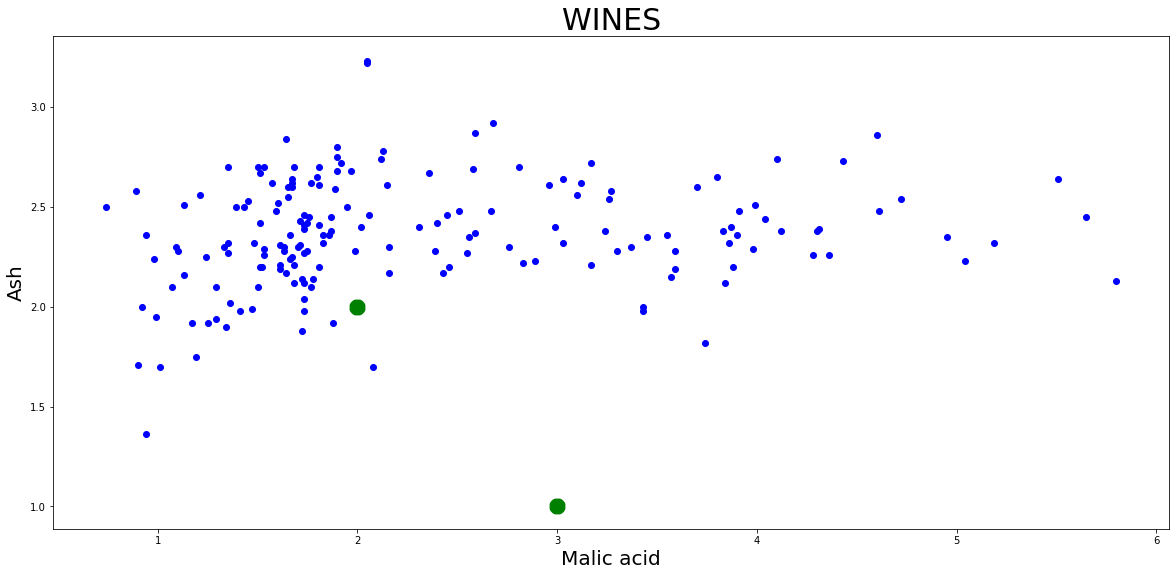

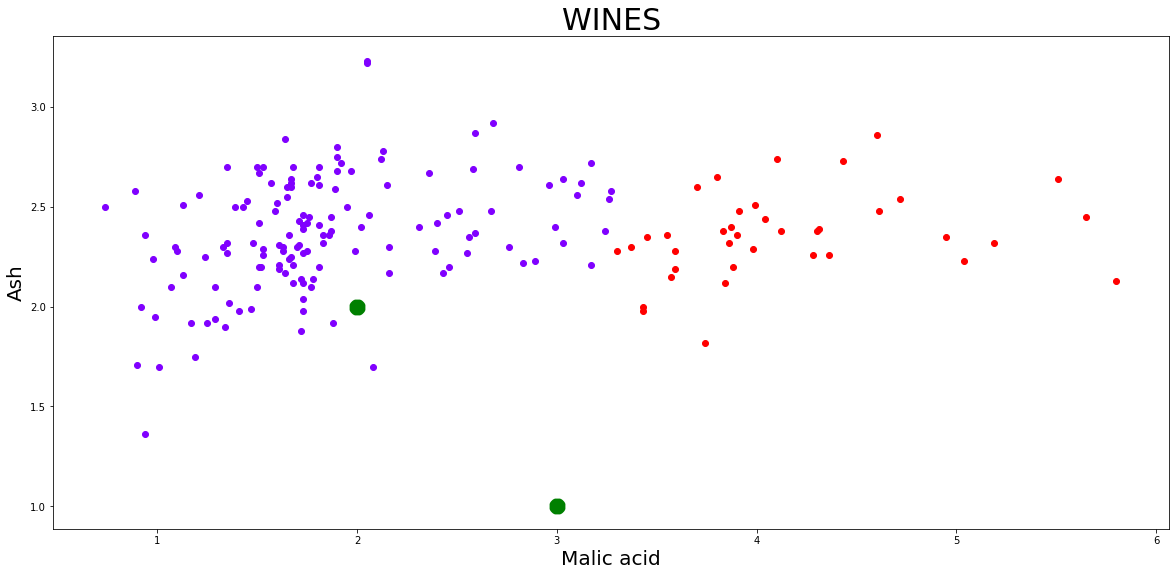

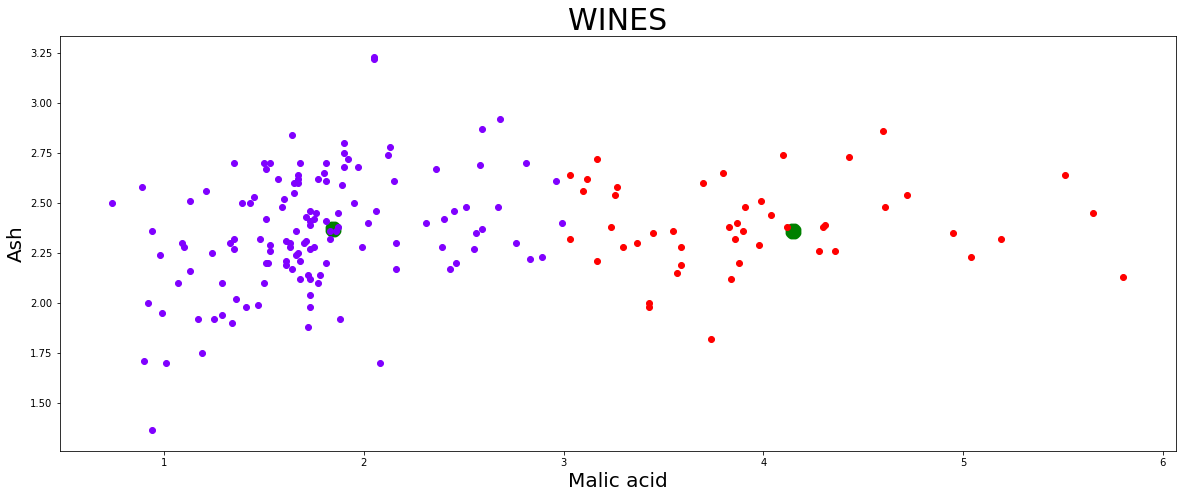

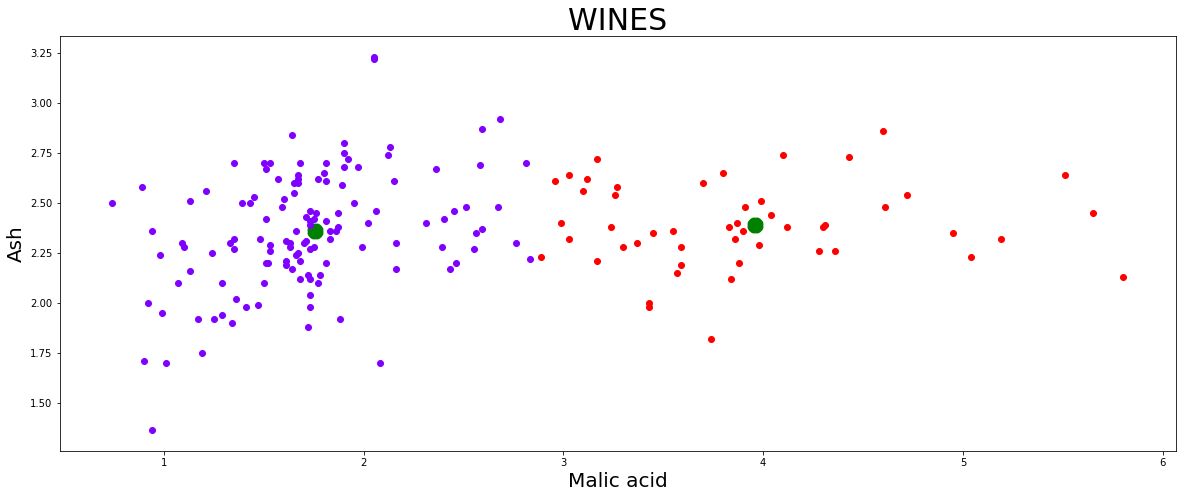

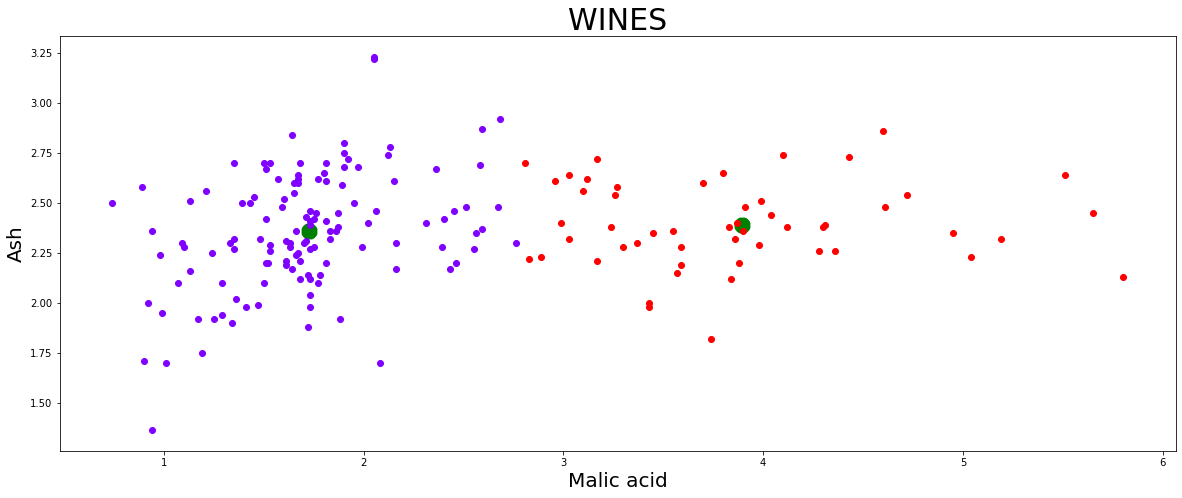

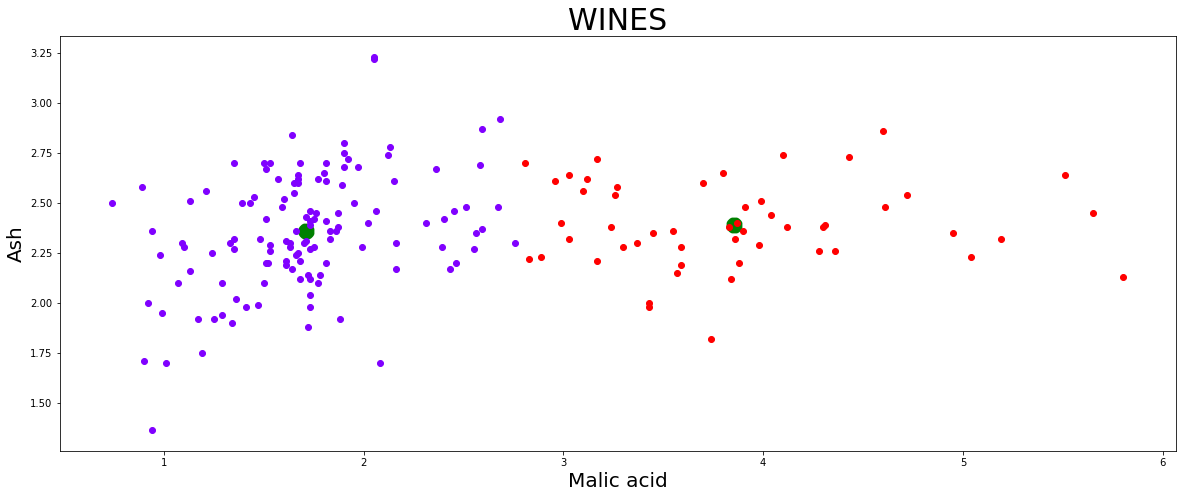

[[(1.71, 2.43),
  (1.78, 2.14),
  (2.36, 2.67),
  (1.95, 2.5),
  (2.59, 2.87),
  (1.76, 2.45),
  (1.87, 2.45),
  (2.15, 2.61),
  (1.64, 2.17),
  (1.35, 2.27),
  (2.16, 2.3),
  (1.48, 2.32),
  (1.73, 2.41),
  (1.73, 2.39),
  (1.87, 2.38),
  (1.81, 2.7),
  (1.92, 2.72),
  (1.57, 2.62),
  (1.59, 2.48),
  (1.63, 2.28),
  (1.86, 2.36),
  (1.6, 2.52),
  (1.81, 2.61),
  (2.05, 3.22),
  (1.77, 2.62),
  (1.72, 2.14),
  (1.9, 2.8),
  (1.68, 2.21),
  (1.5, 2.7),
  (1.66, 2.36),
  (1.83, 2.36),
  (1.53, 2.7),
  (1.8, 2.65),
  (1.81, 2.41),
  (1.64, 2.84),
  (1.65, 2.55),
  (1.5, 2.1),
  (1.71, 2.31),
  (1.89, 2.59),
  (1.77, 2.1),
  (1.68, 2.12),
  (2.02, 2.4),
  (1.73, 2.27),
  (1.73, 2.04),
  (1.65, 2.6),
  (1.75, 2.42),
  (1.9, 2.68),
  (1.67, 2.25),
  (1.73, 2.46),
  (1.7, 2.3),
  (1.97, 2.68),
  (1.43, 2.5),
  (0.94, 1.36),
  (1.1, 2.28),
  (1.36, 2.02),
  (1.25, 1.92),
  (1.13, 2.16),
  (1.45, 2.53),
  (1.21, 2.56),
  (1.01, 1.7),
  (1.17, 1.92),
  (0.94, 2.36),
  (1.19, 1.75),
  (1.61, 2.21

In [60]:
kmeans(data, 2, 2, 3, columns)

# 4. K-means can go wrong!
#### We picked the centers instead of using the random ones to show the case.

In [87]:
def kmeans2(matrix, k, x, y, columns):
    points = []
    for item in matrix:
        points.append((item[x], item[y]))
    centers = [(1.3, 1.3), (1.2, 1.2)] # to store the centers
    clusters = [[] for i in range(k)]  #A list that groupify the points according to the clusters
    #find the input range
    x_min = int(np.floor(min(points)[0]))
    x_max = int(np.ceil(max(points)[0]))
    y_min = int(np.floor(min(points, key = lambda t: t[1]))[1])
    y_max = int(np.ceil(max(points, key = lambda t: t[1]))[1])
    # pick centers by random
#     for _ in range(k):
#         centers.append((random.randrange(x_min, x_max), random.randrange(y_min, y_max)))
    # the first plot without clusters
    plt.figure(figsize=(20,10))
    plt.gca().set_aspect('equal', adjustable='box')
    for c in centers:
        plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
    for point in points:
        plt.scatter(point[0],point[1], c='b', marker='o')
    plt.title('WINES',fontsize=30)
    plt.xlabel(columns[x], fontsize=20)
    plt.ylabel(columns[y], fontsize=20)
    plt.show()
    
    flag = True #to know if we need to continue iterations
    iter = 0 #to count the iterations
    while(flag):
        if iter > 0:
            flag = False
        for point in points:
            cluster = -1
            #find the cluster which contains each point and distance
            for i in range(len(clusters)): 
                for item in clusters[i]:
                    if item == point:
                        cluster = i
            distance = dist(centers[cluster], point)
            #find new cluster for each point and new distance
            distances = [] 
            for c in centers: 
                distances.append(dist(c, point))
            new_distance = min(distances)
            new_cluster = np.argmin(distances)
            # after the first iteration if any changes happens to the clusters
            # ... we need to iter again
            if iter > 0 and cluster != new_cluster and new_distance < distance:
                flag = True
                clusters[cluster].remove(point)
                clusters[new_cluster].append(point)
            if iter == 0:
                clusters[new_cluster].append(point)
                
        
        #updating scatterplot
        plt.figure(figsize=(20,10))
        for c in centers:
            plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
        colors = cm.rainbow(np.linspace(0, 1, k))
        for i in range(k):
            for p in clusters[i]:
                plt.scatter(p[0],p[1], c = [colors[i]], marker='o')
        plt.title('WINES',fontsize=30)
        plt.xlabel(columns[x], fontsize=20)
        plt.ylabel(columns[y], fontsize=20)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
                    

        #updating centers
        for i in range(len(centers)):
            sum_x = 0
            sum_y = 0
            for item in clusters[i]:
                sum_x += item[0]
                sum_y += item[1]
            try:
                centers[i] = (sum_x/len(clusters[i]), (sum_y/len(clusters[i])))
            except ZeroDivisionError:
                pass
        iter +=1
    return clusters
    

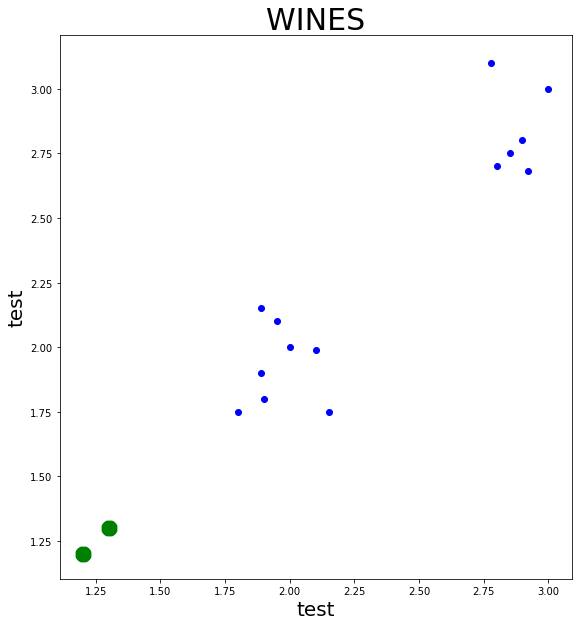

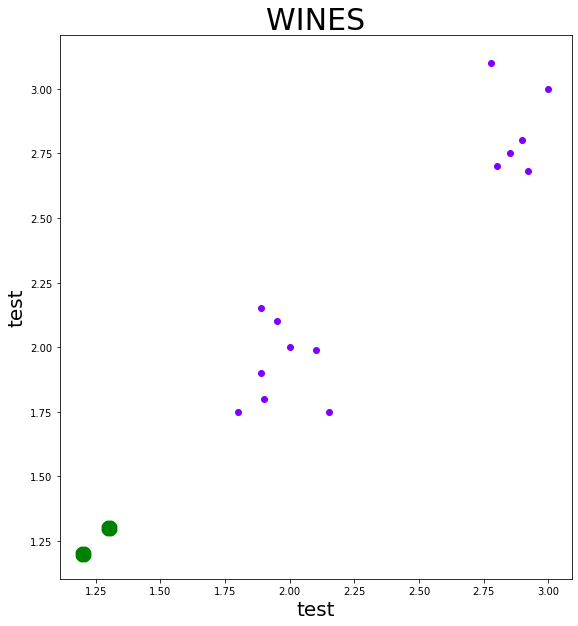

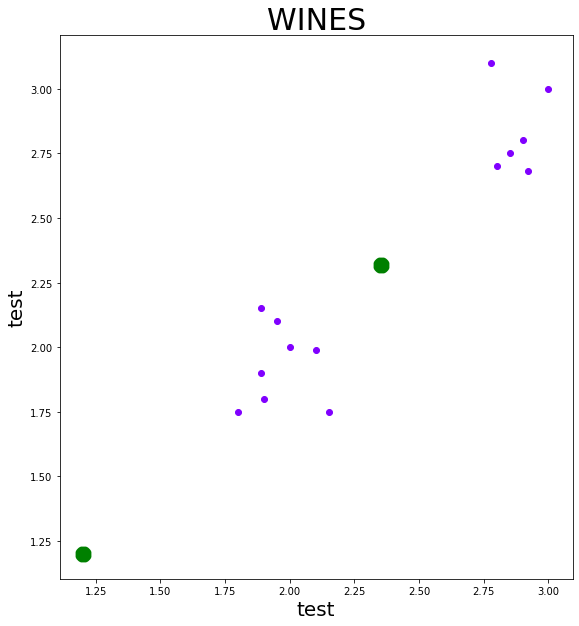

[[(3, 3),
  (2.9, 2.8),
  (2.8, 2.7),
  (2.85, 2.75),
  (2.92, 2.68),
  (2.78, 3.1),
  (1.9, 1.8),
  (1.8, 1.75),
  (1.95, 2.1),
  (2.1, 1.99),
  (1.89, 2.15),
  (2.15, 1.75),
  (1.89, 1.9),
  (2, 2)],
 []]

In [88]:
matrix = [[3, 3], [2.9, 2.8], [2.8, 2.7], [2.85, 2.75], [2.92, 2.68], [2.78, 3.1],
          [1.9, 1.8], [1.8, 1.75], [1.95, 2.1], [2.1, 1.99], [1.89, 2.15], [2.15, 1.75],
          [1.89, 1.90], [2, 2]]
kmeans2(matrix, 2, 0, 1, ['test', 'test'])